ASSIGNMENT  #2

Question 1:

What’s the difference between Gaussian/Normal and Standardized Normal Distribution? How can we transform from Normal to Standardized Normal Distribution? Would the shape of distribution change? 

Answer 1:

Standardized Normal Distribution's mean and standard deviation values are 0 and 1. 
By changing these two values, the shape of distribution will be changed.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as st
import math

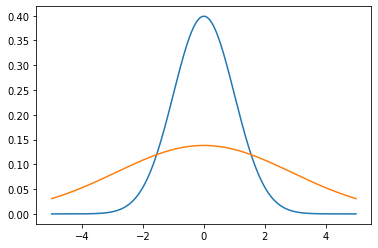

In [2]:

# Plot Standardized Normal Distribution between -5 and 5 with .001 steps.
x_axis = np.arange(-5, 5,0.001)
plt.plot(x_axis, norm.pdf(x_axis,0,1))

# Plot Normal Distribution between -5 and 5 with .001 steps.
x_axis = np.arange(-5, 5,0.001)
plt.plot(x_axis, norm.pdf(x_axis,st.mean(x_axis),st.stdev(x_axis)))
plt.show()

Question 2:

Draw 3 Normal distributions with mean = -5, 0, +5 (draw approximately, concrete scaling is not important). How does mean affect the shape of Gaussian distribution? How does mean affect the position of Normal Distribution? Draw the graphics, so that it is representative of your response. 

Answer 2:

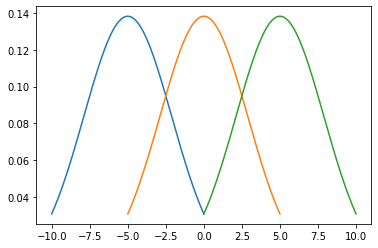

In [3]:
# Plot Normal Distribution between -5 and 5 with .001 steps.
x_axis1 = np.arange(-10, 0, 0.001)
x_axis2 = np.arange(-5, 5, 0.001)
x_axis3 = np.arange(0, 10, 0.001)

plt.plot(x_axis1, norm.pdf(x_axis1,st.mean(x_axis1),st.stdev(x_axis1)))
plt.plot(x_axis2, norm.pdf(x_axis2,st.mean(x_axis2),st.stdev(x_axis2)))
plt.plot(x_axis3, norm.pdf(x_axis3,st.mean(x_axis3),st.stdev(x_axis3)))

plt.show()

Question 3:

Draw 3 Normal distributions with mean = 0, but different variances, let’s say var = 5, 10, 15. How does the variance affect the shape? Try to represent it visually.

Answer 3:

More variance, more positive kurtosis becomes. Skewness doesn't change

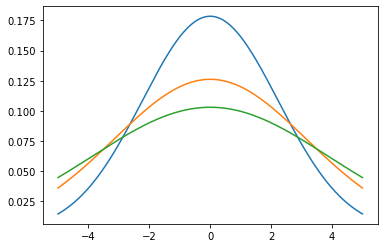

In [4]:
x_axis = np.arange(-5, 5,0.001)
plt.plot(x_axis, norm.pdf(x_axis,0,math.sqrt(5)))
plt.plot(x_axis, norm.pdf(x_axis,0,math.sqrt(10)))
plt.plot(x_axis, norm.pdf(x_axis,0,math.sqrt(15)))

plt.show()

Question 4:

You already know the Empirical Rule (you know it right? :D). In this case, you also should know that it is applied for data which is normally distributed. That’s very cool, but what if Normal Distribution is not followed? :( How can we figure out the ratio of population within standard deviation intervals? No worries, because Chebyshev’s rule (or Chebyshev’s inequality) comes to the rescue. Do some research on this topic and describe it briefly by your own words in order to better know your hero! :D  

Answer 4:

Empirical Rule is used only for Normal Didstribution. However, Chebyshev's Rule is used both for Normal and other distributions. However, Empirical Rule provides exact answers while Chebyshev’s Rule gives approximations

ASSIGNMENT #3

 Question 1:

We have an initial sample of 342 individuals diagnosed with disease A and B respectively. During medical testing, there have been 195 individuals with disease A and 207 individuals diagnosed with disease B.


1.1 How many people have both disease?

In [5]:
print(195+207-342)
#correct

60


1.2 Recall conditional probability. Assume that P(A|B) <= P(B|A). What can we say
about P(A) and P(B)? Which one is bigger? Can we say anything?

In [6]:
ab = 60/342 / 207/342
ba = 60/342 / 195/342
a = 195/342
b = 207/342

print("P(A|B) : ", ab )
print("P(B|A) : ", ba)
print("P(A) : ", a)
print("P(B) : ", b)
print("P(A|B) : ", (ba * a) / b)
#correct

P(A|B) :  2.4781562913697216e-06
P(B|A) :  2.6306582169924733e-06
P(A) :  0.5701754385964912
P(B) :  0.6052631578947368
P(A|B) :  2.478156291369721e-06


1.3 People with disease A are classified into 3 groups: young, adult and senior. 15 out
of 195 individuals are young, 111 are adults, 69 are seniors. Probabilities of young,
adults and senior people contracting disease A are 0.04, 0.2 and 0.14 respectively.
Research a little bit about a law of total conditional probability and apply this concept to
solve this problem. What is P(A) equal to?


In [7]:
P_a = (0.04 * 15/195)+(0.2 * 111/195)+(0.14 * 69/195)
print("P(A) : ", P_a)
print("P(A|young) : ", 0.04)
print("P(A|adult) : ", 0.2)
print("P(A|senior) : ", 0.14)
#correct

P(A) :  0.16646153846153847
P(A|young) :  0.04
P(A|adult) :  0.2
P(A|senior) :  0.14


1.4 This subsection is closely related to the answer you get from 1.3. After you get P(A),
apply Bayes’ theorem to calculate the probabilities P(young|A), P(adult|A) and
P(senior|A).

In [8]:
print("P(young|A) : ", 0.04 * 15/195 / P_a) 
print("P(adult|A) : ", 0.2 * 111/195 / P_a)
print("P(senior|A) : ", 0.14 * 69/195 / P_a)
#correct


P(young|A) :  0.018484288354898334
P(adult|A) :  0.6839186691312386
P(senior|A) :  0.2975970425138632


Question 2:

2.1 A bowl contains 42 black balls and 12 white ones. You have decided to conduct an
experiment. As a part of the experiment, you pick one ball per draw and keep it for
yourself. What’s the probability of picking 1 white and 1 black ball?


In [19]:
b = 42
w = 12
t = 54

def c(n, k):
    val = math.factorial(n)/math.factorial(n-k)*math.factorial(k)
    return val
#wrong
# p1 = b/t * w/(t-1)
# p2 = w/t * b/(t-1)
# p = p1 + p2 
# print(p)

#correct
print(c(w,1)*c(b,1)/c(t,2))


0.0880503144654088


2.2 In athletics, there is a relay event where 2 male and 2 female athletes are allowed to
participate in the following order: M, M, F, F. If the team consists of 10 males and 6
females, how many legal ways exist to come up with a team?

In [10]:
m = math.factorial(10) / math.factorial(10-2)
f = math.factorial(6) / math.factorial(6-2)
print(m*f)
#correct

2700.0


Question 3:     

3. In a class, there are 25 male and 15 female students. The probability that a male student scores above 80% on the Math exam is 35% while a female student scoring above 80% has a probability of 25%.

3.1. What is the probability of a student, selected at random, scoring above 80% on this exam?

In [11]:
P_80 = (0.35 * 25/40)+(0.25 * 15/40)
print(P_80)
#correct

0.3125


3.2 Use the result from 3.1. What is the probability of a student to be a male, given that the result is above 80%?

In [12]:
P_M80 = (0.35*25/40)/P_80
print(P_M80)
#correct

0.7


Question 4: 

4. Likelihood and probability are the terms that are used interchangeably, so that even professionals with a huge capacity of experience confuse them. The reason is these words are used quite often in daily life. However, in statistics, they are not the same. Explain the difference between them in your own words. Use graphical representation for this.


Probability to have more than 3 is 85.07%


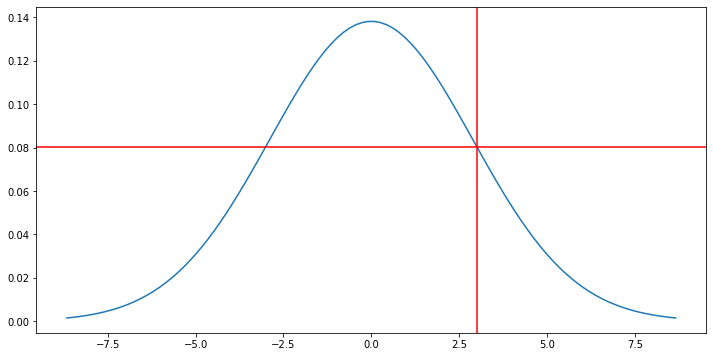

In [13]:
x_axis = np.arange(-5, 5,0.001)
norm(st.mean(x_axis), st.stdev(x_axis))
x1 = 3
y1 = norm(st.mean(x_axis), st.stdev(x_axis)).cdf(x1)
z1 = norm(st.mean(x_axis), st.stdev(x_axis)).pdf(x1)

plt.figure(figsize=(12,6))
ax = plt.gca()
x = np.linspace(st.mean(x_axis)-3*st.stdev(x_axis), st.mean(x_axis) + 3*st.stdev(x_axis), 100)
plt.plot(x, norm.pdf(x, st.mean(x_axis), st.stdev(x_axis)))
plt.axvline(x1, color='red')
plt.axhline(z1, color='red')
print("Probability to have more than {} is {}%".format(x1, round(100*y1,2)))
plt.show()

Likelihood is the dot where shown by intersection of two red lines. However, probability is the area that includes 85.07% of the graph

Question 5:

5. Naive Bayes is the Supervised Machine Learning algorithm used for classification. If you are not familiar with terms “supervised”, “classification” and “Naive Bayes” no need to be worried at all, we are gonna cover all of them (at least I hope you are familiar with the term “Machine Learning” :D). All I want from you at this stage is to research about term Naive Bayes, write about it briefly in your own words (as much as you can) and specifically about why it is called “Naive”. Good luck! Turn on your research ability to the maximum!

Algorithm is called Naive, because inputs are independent of each other. Changing one input feature won’t affect any of the others. Algorithm consists of conditional probability and Bayes Rule. 